Importance Sampling
---
Using sampling to approximate a distribution
$$E[f(x)] = \int f(x)p(x) dx = \int f(x)\frac{p(x)}{q(x)}q(x) dx \approx \frac{1}{n} \sum_{i} f(x_i)\frac{p(x_i)}{q(x_i)}$$

where $ x \sim q(x)$

Idea of importance sampling: draw the sample from a proposal distribution and re-weight the integral using importance weights so that the correct distribution is targeted

$$Var(X) = E[X^2] - E[X]^2$$

**Reference**

- [1](https://www.youtube.com/watch?v=3Mw6ivkDVZc)
- [2](https://astrostatistics.psu.edu/su14/lectures/cisewski_is.pdf)

In [69]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

/Users/jeremy.zhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jeremy.zhang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [161]:
def f_x(x):
    return 1/(1 + np.exp(-x))

def distribution(mu=0, sigma=1):
    # return probability given a value
    distribution = stats.norm(mu, sigma)
    return distribution

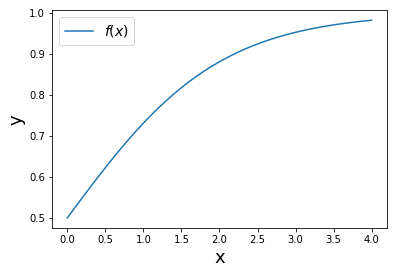

In [121]:
plt.figure(figsize=[6, 4])
x = np.linspace(0, 4, 50)  # x ranges from 0 to 4
y = [f_x(i) for i in x]

plt.plot(x, y, label="$f(x)$")

plt.xlabel("x", size=18)
plt.ylabel("y", size=18)
plt.legend(prop={"size": 14})

## Sampling

In [169]:
# pre-setting
n = 1000

mu_target = 3.5
sigma_target = 1
mu_appro = 3
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

/Users/jeremy.zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jeremy.zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


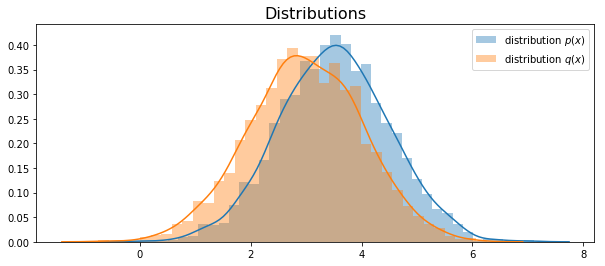

In [170]:
plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()

In [178]:
# value
s = 0
for i in range(n):
    # draw a sample
    x_i = np.random.normal(mu_target, sigma_target)
    s += f_x(x_i)
print("simulate value", s/n)

simulate value 0.9542816022260111


In [172]:
# calculate value sampling from a different distribution

value_list = []
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)

print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

average 0.9495227171370471 variance 0.3043862985463373


## Different $q(x)$

In [179]:
# pre-setting
n = 5000

mu_target = 3.5
sigma_target = 1
mu_appro = 1
sigma_appro = 1

p_x = distribution(mu_target, sigma_target)
q_x = distribution(mu_appro, sigma_appro)

/Users/jeremy.zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jeremy.zhang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


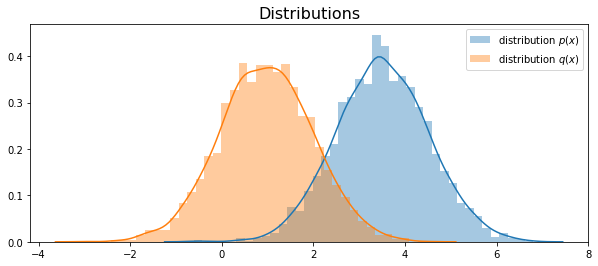

In [182]:
plt.figure(figsize=[10, 4])

sns.distplot([np.random.normal(mu_target, sigma_target) for _ in range(3000)], label="distribution $p(x)$")
sns.distplot([np.random.normal(mu_appro, sigma_appro) for _ in range(3000)], label="distribution $q(x)$")

plt.title("Distributions", size=16)
plt.legend()

In [181]:
# calculate value sampling from a different distribution

value_list = []
# need larger steps
for i in range(n):
    # sample from different distribution
    x_i = np.random.normal(mu_appro, sigma_appro)
    value = f_x(x_i)*(p_x.pdf(x_i) / q_x.pdf(x_i))
    
    value_list.append(value)

print("average {} variance {}".format(np.mean(value_list), np.var(value_list)))

average 0.9959984807502844 variance 83.36158359644132
